1. # Importing laibraries 

In [2]:
#laibraries for read_data  
import numpy as np
import pandas as pd

# Virsualization for data 
import matplotlib.pyplot as plt

# import Callbacks for EarlySttoping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# important laibary for bulding Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

# Data Augmentation (THis is bonus part)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Read Data From Kaggle

In [3]:
#SPlit our data into 4 parts (x_train,x_test,y_train,y_test)
X_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv').to_numpy()
X_test=pd.read_csv('/kaggle/input/ahcd1/csvTestImages 3360x1024.csv').to_numpy()
y_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv').to_numpy()-1
y_test=pd.read_csv('/kaggle/input/ahcd1/csvTestLabel 3360x1.csv').to_numpy()-1

In [4]:
# printing the Shape of data to show no rows,columns 
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 1024)
X_test shape is  (3359, 1024)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [5]:
# We Need to do Reshape our Data 
X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [6]:
# printing the Shape of data to show no rows,columns after Reshape
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 32, 32, 1)
X_test shape is  (3359, 32, 32, 1)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


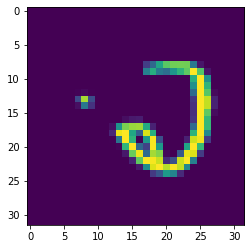

In [7]:
plt.imshow(X_test[150])

In [8]:
#Transform y_train,y_test into Categorical data 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

y_train shape is  (13439, 28)
y_test shape is  (3359, 28)


# Data Augmentation

In [10]:
# Data Augmentation
gen=ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.3
)
train_data=gen.flow(
    X_train,
    y_train,
)

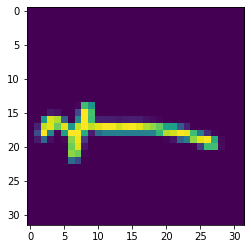

In [11]:
plt.imshow(X_test[0])

# Model

In [12]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(28, activation='softmax')
])


2022-12-15 22:44:43.320357: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Callbacks

In [13]:
reduce=ReduceLROnPlateau(
    factor=0.1,
    min_lr=0.00001
)

In [14]:
callbacks=[reduce]

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          7

# Fiting

In [17]:
model.fit(train_data,epochs=30,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/30


2022-12-15 22:44:43.618389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


420/420 [==============================] - 20s 45ms/step - loss: 1.6920 - accuracy: 0.4433 - val_loss: 131.4036 - val_accuracy: 0.6946
Epoch 2/30
420/420 [==============================] - 18s 43ms/step - loss: 0.6621 - accuracy: 0.7656 - val_loss: 98.6501 - val_accuracy: 0.8020
Epoch 3/30
420/420 [==============================] - 18s 43ms/step - loss: 0.4742 - accuracy: 0.8333 - val_loss: 60.8274 - val_accuracy: 0.8696
Epoch 4/30
420/420 [==============================] - 17s 41ms/step - loss: 0.3581 - accuracy: 0.8767 - val_loss: 38.1756 - val_accuracy: 0.9190
Epoch 5/30
420/420 [==============================] - 18s 42ms/step - loss: 0.3009 - accuracy: 0.8963 - val_loss: 50.1354 - val_accuracy: 0.9119
Epoch 6/30
420/420 [==============================] - 18s 42ms/step - loss: 0.2540 - accuracy: 0.9144 - val_loss: 55.0374 - val_accuracy: 0.9018
Epoch 7/30
420/420 [==============================] - 17s 40ms/step - loss: 0.2190 - accuracy: 0.9258 - val_loss: 46.3117 - val_accuracy: 0.

# Accuracy

In [18]:
losses=pd.DataFrame(model.history.history)

In [19]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,1.692013,0.443262,131.403625,0.694552,0.0010
1,0.662134,0.765608,98.650131,0.802024,0.0010
2,0.474198,0.833321,60.827385,0.869604,0.0010
3,0.358094,0.876702,38.175583,0.919024,0.0010
4,0.300934,0.896272,50.135406,0.911879,0.0010
5,0.253998,0.914428,55.037445,0.901756,0.0010
6,0.218998,0.925813,46.311691,0.917535,0.0010
7,0.208080,0.928343,35.083275,0.944626,0.0010
8,0.184021,0.938239,34.075787,0.946115,0.0010
9,0.159617,0.946425,80.644150,0.896398,0.0010


<AxesSubplot:>

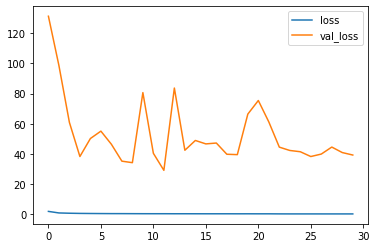

In [20]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

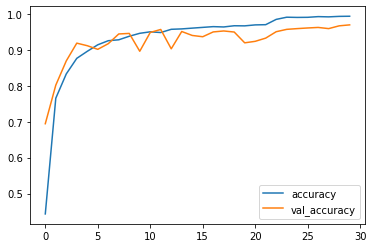

In [21]:
losses[['accuracy','val_accuracy']].plot()

In [80]:
model.evaluate(X_test,y_test)

105/105 [==============================] - 1s 12ms/step - loss: 39.1565 - accuracy: 0.9699


[39.156497955322266, 0.9699315428733826]

In [38]:
predict=model.predict(X_test)

# **Predicting**

In [78]:
# 550 Means the picture number in test_data
x=np.argmax(predict[550])  
if(x==23):
    print("لام")
else:
    print(":) للاسف مش لام ")    
#and the output Means this is the label of this charater(الف,باء,تاء.......)

لام


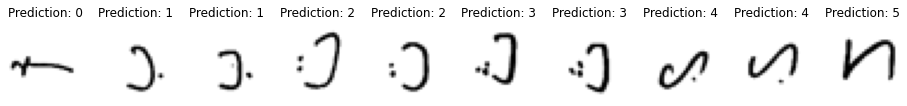

In [64]:
pred=model.predict(X_test)
pred = [np.argmax(i) for i in pred]
_,axes = plt.subplots(nrows=1,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes,X_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}')

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_test)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets